# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 2 March 2022 from GDrive
(1) CF for SED and Water: https://drive.google.com/drive/folders/1hm4YNib_kI5Y4k7xp4E47w8qDjUIsagA?usp=sharing
(2) Metadata:

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29_Jaccard.csv"
df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_water.columns.nunique())

# Join datasets
df = df_water.copy()

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()
print(df.shape)
df.head()

Water: (265, 266)
266
Duplicated column: False
(265, 266)


,sample_id,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
0,SW_S19S.0003_U_1,0.000000,0.355727,0.336476,0.322602,0.347937,0.330517,0.396684,0.390567,0.391726,...,0.427941,0.440325,0.453488,0.460775,0.498927,0.439427,0.435175,0.459696,0.519608,0.338761
1,SW_S19S.0003_U_2,0.355727,0.000000,0.282867,0.285123,0.275413,0.281410,0.373414,0.384390,0.387787,...,0.369915,0.397099,0.367101,0.353041,0.432471,0.423841,0.413348,0.446696,0.530916,0.292954
2,SW_S19S.0003_U_3,0.336476,0.282867,0.000000,0.254438,0.258015,0.247882,0.346588,0.369463,0.362126,...,0.361528,0.437520,0.390221,0.389064,0.480366,0.454700,0.414222,0.480292,0.569069,0.338183
3,SW_S19S.0004_U_1,0.322602,0.285123,0.254438,0.000000,0.240495,0.242188,0.342504,0.377984,0.373810,...,0.372035,0.443845,0.399272,0.407316,0.486757,0.431098,0.391906,0.465633,0.572718,0.334084
4,SW_S19S.0004_U_2,0.347937,0.275413,0.258015,0.240495,0.000000,0.220025,0.332399,0.362706,0.360607,...,0.357362,0.429251,0.391659,0.394052,0.480732,0.433616,0.395042,0.462075,0.574074,0.333227


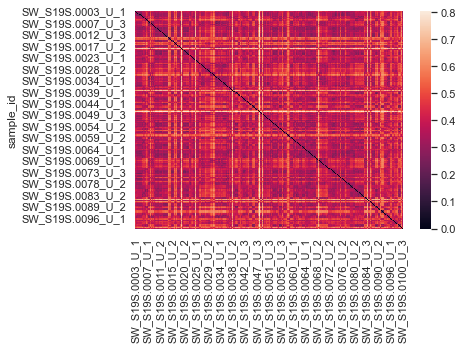

In [3]:
np.random.seed(0)
sns.set_theme()
uniform_data = df.set_index('sample_id')
ax = sns.heatmap(uniform_data)

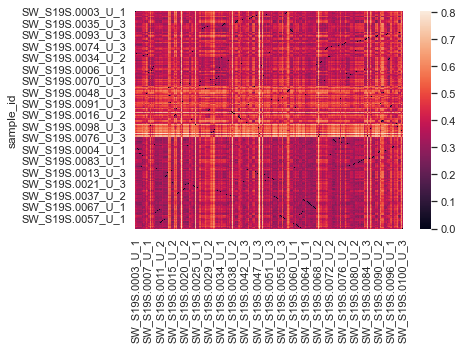

In [4]:
label = pd.read_csv('interim_clustering_results.csv')
label = label[['sample_id','cluster']].set_index('sample_id')

uniform_data = pd.merge(uniform_data.reset_index(), label.reset_index(), on='sample_id', how='left').sort_values('cluster')
uniform_data = uniform_data.set_index('sample_id').drop(columns=['cluster'])
ax = sns.heatmap(uniform_data)

In [5]:
uniform_data

,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0097_U_2,SW_S19S.0097_U_3,SW_S19S.0098_U_1,SW_S19S.0098_U_2,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3
sample_id,,,,,,,,,,,,,,,,,,,,,
SW_S19S.0003_U_1,0.000000,0.355727,0.336476,0.322602,0.347937,0.330517,0.396684,0.390567,0.391726,0.446185,...,0.427941,0.440325,0.453488,0.460775,0.498927,0.439427,0.435175,0.459696,0.519608,0.338761
SW_S19S.0057_U_3,0.397478,0.416849,0.396536,0.400602,0.403096,0.401629,0.387041,0.392459,0.383889,0.423962,...,0.473801,0.521163,0.534794,0.523634,0.576144,0.446681,0.443597,0.463125,0.576909,0.419218
SW_S19S.0057_U_2,0.377324,0.350966,0.334968,0.333238,0.338627,0.336398,0.350095,0.405613,0.378456,0.360783,...,0.405793,0.489425,0.473920,0.471470,0.538415,0.401073,0.362101,0.431759,0.605152,0.368822
SW_S19S.0051_U_1,0.397776,0.308966,0.285149,0.314226,0.300564,0.297712,0.396216,0.436088,0.435649,0.420983,...,0.406360,0.482006,0.428783,0.407396,0.488298,0.513710,0.462513,0.529133,0.590197,0.402514
SW_S19S.0050_U_3,0.375213,0.377076,0.368537,0.371003,0.370883,0.371963,0.408500,0.406332,0.413718,0.432005,...,0.450086,0.489946,0.494288,0.476696,0.534701,0.465242,0.457057,0.476265,0.550742,0.397453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SW_S19S.0061_U_1,0.418260,0.388547,0.360876,0.356403,0.363489,0.363909,0.271978,0.357602,0.338068,0.322470,...,0.304063,0.451566,0.420201,0.447006,0.523726,0.331443,0.280899,0.387171,0.624044,0.368884
SW_S19S.0061_U_2,0.370140,0.376207,0.354223,0.339800,0.348879,0.347168,0.284475,0.282904,0.304515,0.388393,...,0.358737,0.427101,0.450076,0.461133,0.527071,0.351886,0.347128,0.392337,0.554619,0.339848
SW_S19S.0061_U_3,0.411221,0.439539,0.399612,0.384658,0.394629,0.399834,0.290622,0.364545,0.333333,0.364731,...,0.384325,0.506333,0.499586,0.512202,0.580334,0.365551,0.313129,0.412903,0.621778,0.410523


## Clustering the water samples based on principal components after normalisation across row and col for high dimensional binary data

In [6]:
sw = df_water.rename(columns={"Unnamed: 0": "sample_id"}).set_index("sample_id")
print("Shape:" + str(sw.shape))

Shape:(265, 265)


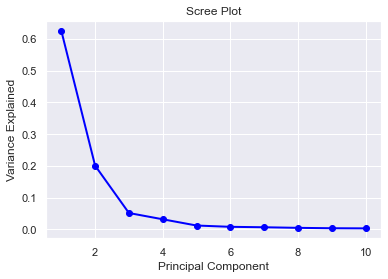

In [7]:
# Dimensionality reduction
from sklearn.decomposition import PCA

n = 10

#define PCA model to use
pca = PCA(n_components=n)

#fit PCA model to data
pca_fit = pca.fit(sw)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [8]:
print(pca.explained_variance_ratio_)

[0.62610796 0.2006206  0.05129688 0.03152776 0.01185335 0.00775656
 0.00638513 0.00452518 0.00332231 0.00287886]


Text(0, 0.5, 'Cumulative explained variance')

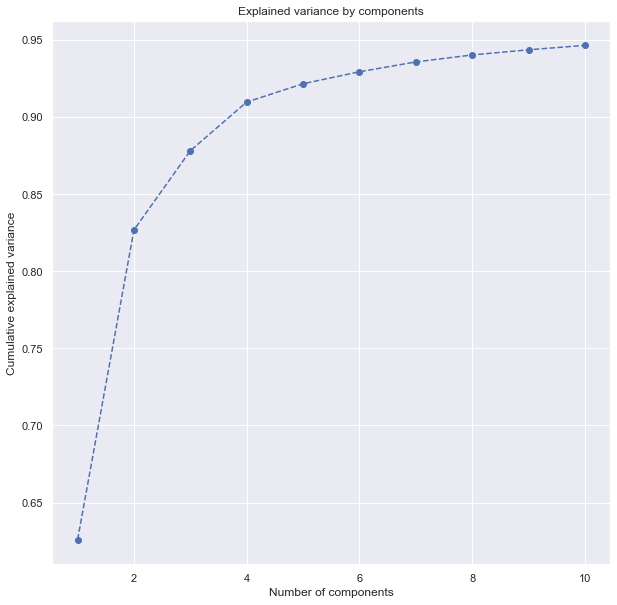

In [9]:
plt.figure(figsize = (10,10))
plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#### Clustering

In [20]:
# Based on scree plot, n PCs for >90% variance explained
#define PCA model to use
npc = 4
pca = PCA(n_components=npc)

#fit PCA model to data
pca_fit = pca.fit(sw)
X = pca.transform(sw)

In [21]:
# Keep only CF
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [24]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2,10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

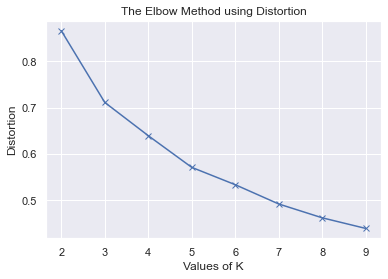

In [25]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

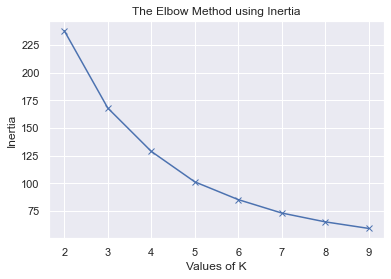

In [26]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [27]:
k = 5
kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
kmeanModel.fit(X)
distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
inertias.append(kmeanModel.inertia_)
mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
mapping2[k] = kmeanModel.inertia_

In [28]:
from sklearn import metrics
metrics.silhouette_score(X, kmeanModel.labels_, metric='euclidean')

0.32619500286457087

C:\Users\mchang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


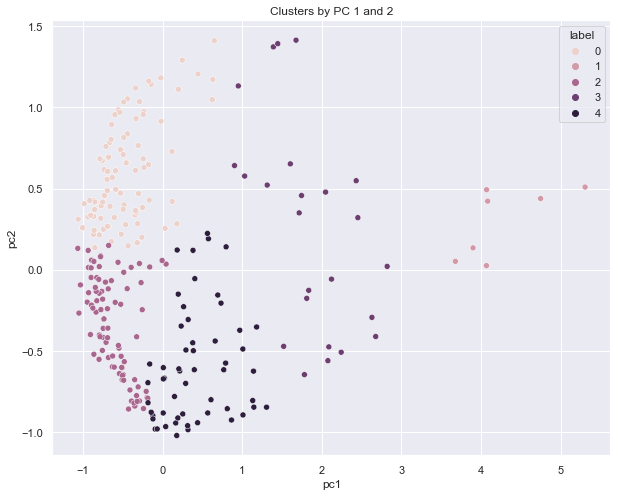

In [29]:
# Visualise
sw_pca_kmeans = pd.concat([sw.reset_index(), pd.DataFrame(X)], axis=1)
sw_pca_kmeans.columns.values[-npc:] = ['pc1','pc2','pc3','pc4'] 
sw_pca_kmeans['label'] = kmeanModel.labels_

x_axis = sw_pca_kmeans['pc1']
y_axis = sw_pca_kmeans['pc2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = sw_pca_kmeans['label'])
plt.title('Clusters by PC 1 and 2')
plt.show()

In [43]:
results = sw.copy()
results["cluster"] = kmeanModel.labels_
results["cluster"].value_counts()

0    92
2    87
4    55
3    24
1     7
Name: cluster, dtype: int64

In [44]:
results.head()

,sample_id,C10H10O5,C10H10O6,C10H10O7,C10H10O8,C10H11O5N,C10H11O6N,C10H12O5,C10H12O5N2,C10H12O5S,...,C9H14O6S,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,cluster
0,SW_S19S.0003_U_1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,1,2
1,SW_S19S.0003_U_2,1,1,1,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,2
2,SW_S19S.0003_U_3,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,2
3,SW_S19S.0004_U_1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,2
4,SW_S19S.0004_U_2,1,1,1,1,1,1,1,1,0,...,0,0,1,0,1,0,0,1,1,2


In [45]:
sw = pd.read_csv('sw_for_clustering.csv')
temp = sw.copy()
temp["cluster"] = kmeanModel.labels_
temp = temp.groupby("cluster").any()
temp.sum(axis=1)

cluster
0    4562
1    1624
2    4518
3    3825
4    4310
dtype: int64

In [46]:
# label cluster
results["Jaccard_label"] = np.nan
results.loc[results["cluster"] == 1, "Jaccard_label"] = "Least"
results.loc[results["cluster"] == 3, "Jaccard_label"] = "Less"
results.loc[results["cluster"] == 4, "Jaccard_label"] = "Average"
results.loc[results["cluster"] == 2, "Jaccard_label"] = "More"
results.loc[results["cluster"] == 0, "Jaccard_label"] = "Most"

In [49]:
results.to_csv('knn_jaccard.csv')

In [50]:
results.head()

,sample_id,C10H10O5,C10H10O6,C10H10O7,C10H10O8,C10H11O5N,C10H11O6N,C10H12O5,C10H12O5N2,C10H12O5S,...,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,cluster,Jaccard_label
0,SW_S19S.0003_U_1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,1,2,More
1,SW_S19S.0003_U_2,1,1,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,1,2,More
2,SW_S19S.0003_U_3,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,2,More
3,SW_S19S.0004_U_1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,2,More
4,SW_S19S.0004_U_2,1,1,1,1,1,1,1,1,0,...,0,1,0,1,0,0,1,1,2,More
